# Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights


In [121]:
import pandas as pd

df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

df.head()


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


### Part 1: Understanding Product Categories

1. Frequency Tables:

In [91]:
category_frequency = df['category'].value_counts()

In [51]:
category_frequency.head(5)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

2. Visualizations:

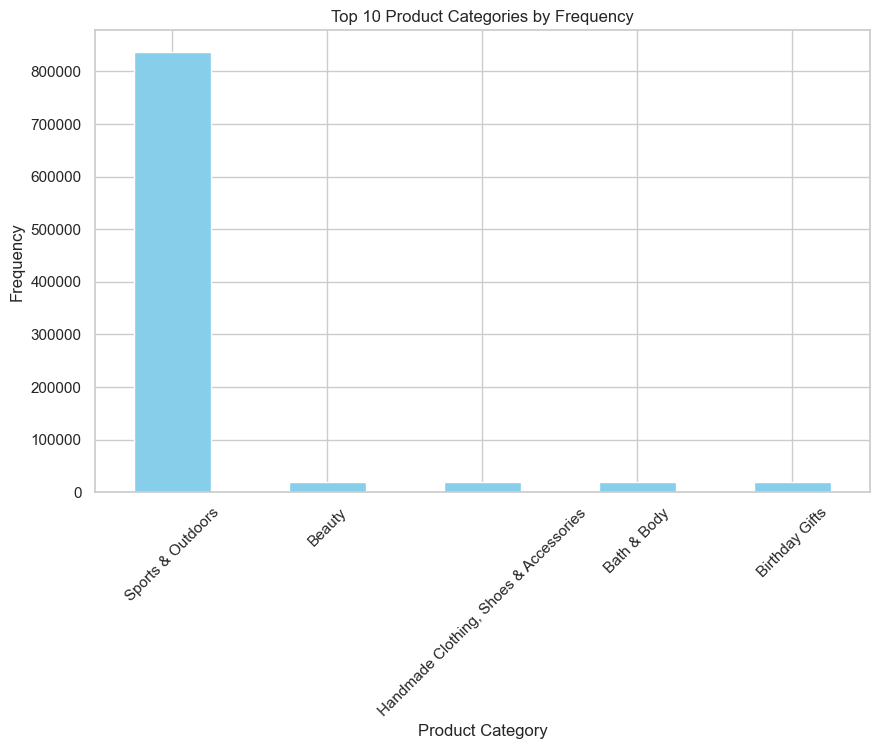

In [52]:
plt.figure(figsize=(10, 6))
category_frequency.head(5).plot(kind='bar', color='skyblue')
plt.title('Top 10 Product Categories by Frequency')
plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# the category "Sports & Outdoors" dominates the listings

### Part 2: Delving into Product Pricing

1. Measures of Centrality:

In [105]:
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]  

mean_price, median_price, mode_price

#The average price point is higher than the most common price point

(89.24380943923663, 19.09, 9.99)

2. Measures of Dispersion:

In [106]:
df['price'].quantile(0.30)

11.77

In [107]:
variance_price = df['price'].var()
std_dev_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])

variance_price, std_dev_price, min_price, max_price, range_price, quantiles_price

# The variance is quite high at approximately 119,445, which suggests there's a large spread in the prices. The standard deviation is about 345, which is also large and confirms a wide variation in prices.

(119445.48532254907,
 345.60886175349884,
 0.0,
 100000.0,
 100000.0,
 0.25     9.99
 0.50    19.09
 0.75    45.99
 Name: price, dtype: float64)

In [108]:
df['price'].quantile(0.1)

5.99

3. Visualizations:

<Axes: xlabel='price', ylabel='Count'>

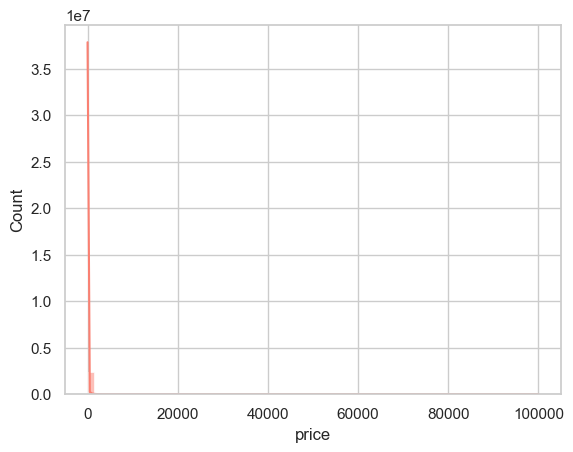

In [115]:
sns.histplot(df['price'], kde=True, bins=70, color='salmon')

In [ ]:
#The existence of very expensive products stretches the x-axis, causing the lower-priced products to be compressed into a small part of the chart. This results in a loss of detail for the majority of the data.

#### Using a boxplot

<Axes: ylabel='price'>

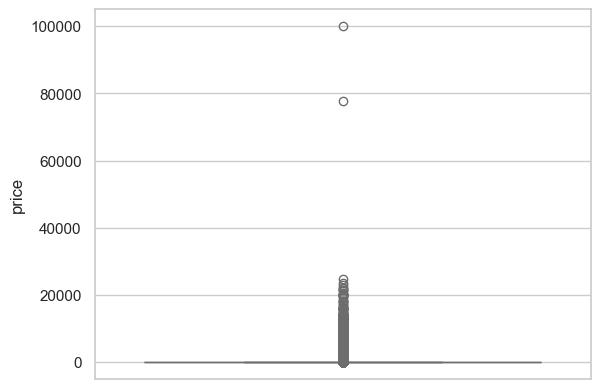

In [36]:
sns.boxplot(data=df['price'], color='salmon')

In [ ]:
# Most products are in a lower price bracket, and there's a big jump to the more expensive products, which are few in number.
#The market includes some items that are priced much higher than the median range of products, which could represent luxury or high-value items.
#The highly skewed nature of the data, where a small number of very high prices pull the mean upwards away from the median.

### Part 3: Unpacking Product Ratings

1. Measures of Centrality:

In [124]:
df = df[df['stars'] > 0]

In [125]:
mean_price = df['stars'].mean()
median_price = df['stars'].median()
mode_price = df['stars'].mode()[0]  


mean_price, median_price, mode_price


(4.31916076222691, 4.4, 4.5)

In [127]:
#The median rating of 4.4 implies that at least half of the ratings are at or above this level.

2. Measures of Dispersion:

In [128]:
df['stars'].quantile(0.30)

4.2

In [129]:
variance_price = df['stars'].var()
std_dev_price = df['stars'].std()
min_price = df['stars'].min()
max_price = df['stars'].max()
range_price = max_price - min_price
quantiles_price = df['stars'].quantile([0.25, 0.5, 0.75])

variance_price, std_dev_price, min_price, max_price, range_price, quantiles_price

(0.30834337523872835,
 0.5552867504620729,
 1.0,
 5.0,
 4.0,
 0.25    4.1
 0.50    4.4
 0.75    4.6
 Name: stars, dtype: float64)

In [131]:
# Approximately 0.308, which is relatively low, suggesting that the ratings do not vary widely from the mean.
# Approximately 0.555, further indicates that most ratings are within half a point of the mean rating.

3. Shape of the Distribution:

In [132]:
skewness_price = df['stars'].skew()
kurtosis_price = df['stars'].kurtosis()

skewness_price, kurtosis_price

(-2.3795681122127945, 9.78193769066435)

In [133]:
# The skewness is approximately -2.38. This means that there is a tail on the lower end of the scale, but the bulk of the data leans towards the higher values.
# The kurtosis being approximately 9.78. Suggests that there are more outliers than expected in a normal distribution, with many ratings clustering around a central point and a few ratings that are much lower.

4. Visualizations:

<Axes: xlabel='stars', ylabel='Count'>

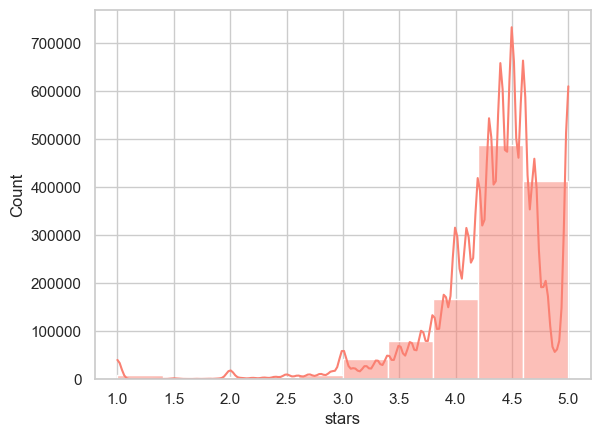

In [134]:
sns.histplot(df['stars'], kde=True, bins=10, color="salmon")

In [135]:
# The data is concentrated towards the higher end of the scale, with a significant number of 4.0 and above ratings.